In [1]:
%pip install q keras==2.4.1
%pip install segmentation_models
%pip install tensorflow_io
%pip install q tensorflow==2.4

  Using cached Keras-2.4.1-py2.py3-none-any.whl (169 kB)
INFO: pip is looking at multiple versions of tensorflow-intel to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ca/a9/8cf654c2a89ea0103f3d3ea6f953b425d22f98736f7c2d2ebccf863b6d31/tensorflow-2.12.1-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.12.1-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Obtaining dependency information for tensorflow-intel==2.12.1 from https://files.pythonhosted.org/packages/d4/60/1ca023f19c8c22e283f5fd3fd209dbe11c8fb7a5078fc4ff247738eab74d/tensorflow_intel-2.12.1-cp311-

ERROR: Cannot install keras==2.4.1 and tensorflow because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.4 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.14.0rc0, 2.14.0rc1)
ERROR: No matching distribution found for tensorflow==2.4


In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.13.0


In [4]:
%pip install tensorflow==2.4.0rc4

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.0rc4 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.14.0rc0, 2.14.0rc1)
ERROR: No matching distribution found for tensorflow==2.4.0rc4


In [5]:
import tensorflow as tf

In [6]:
def Conv2D_Block(input_tensor , n_filters):
  x = tf.keras.layers.Conv2D(filters = n_filters , kernel_size = (3 , 3) , kernel_initializer = 'he_normal' , padding = 'same')(input_tensor)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  
  x = tf.keras.layers.Conv2D(filters = n_filters , kernel_size = (3 , 3) , kernel_initializer = 'he_normal' , padding = 'same')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  
  return x

In [7]:
def U_Net(img_tensor , n_filters = 16):
  conv1 = Conv2D_Block(img_tensor , n_filters * 1)
  pool1 = tf.keras.layers.MaxPooling2D((2 , 2))(conv1)
  pool1 = tf.keras.layers.Dropout(0.05)(pool1)
  
  conv2 = Conv2D_Block(pool1 , n_filters * 2)
  pool2 = tf.keras.layers.MaxPooling2D((2 , 2))(conv2)
  pool2 = tf.keras.layers.Dropout(0.05)(pool2)
  
  conv3 = Conv2D_Block(pool2 , n_filters * 4)
  pool3 = tf.keras.layers.MaxPooling2D((2 , 2))(conv3)
  pool3 = tf.keras.layers.Dropout(0.05)(pool3)
  
  conv4 = Conv2D_Block(pool3 , n_filters * 8)
  pool4 = tf.keras.layers.MaxPooling2D((2 , 2))(conv4)
  pool4 = tf.keras.layers.Dropout(0.05)(pool4)
  
  conv5 = Conv2D_Block(pool4 , n_filters * 16)
  
  pool6 = tf.keras.layers.Conv2DTranspose(n_filters * 8 , (3 , 3) , (2, 2) , padding = 'same')(conv5)
  pool6 = tf.keras.layers.concatenate([pool6 , conv4])
  pool6 = tf.keras.layers.Dropout(0.05)(pool6)
  conv6 = Conv2D_Block(pool6 , n_filters * 8)
  
  pool7 = tf.keras.layers.Conv2DTranspose(n_filters * 4 , (3 , 3) , (2 , 2) , padding = 'same')(conv6)
  pool7 = tf.keras.layers.concatenate([pool7 , conv3])
  pool7 = tf.keras.layers.Dropout(0.05)(pool7)
  conv7 = Conv2D_Block(pool7 , n_filters * 4)
  
  pool8 = tf.keras.layers.Conv2DTranspose(n_filters * 2 , (3 , 3) , (2 , 2) , padding = 'same')(conv7)
  pool8 = tf.keras.layers.concatenate([pool8 , conv2])
  pool8 = tf.keras.layers.Dropout(0.05)(pool8)
  conv8 = Conv2D_Block(pool8 , n_filters * 2)
  
  pool9 = tf.keras.layers.Conv2DTranspose(n_filters * 1 , (3 , 3) , (2 , 2) , padding = 'same')(conv8)
  pool9 = tf.keras.layers.concatenate([pool9 , conv1])
  pool9 = tf.keras.layers.Dropout(0.05)(pool9)
  conv9 = Conv2D_Block(pool9 , n_filters * 1)
  
  output = tf.keras.layers.Conv2D(1 , (1 , 1) , activation = 'sigmoid')(conv9)
  
  u_net = tf.keras.Model(inputs = [img_tensor] , outputs = [output])
  
  return u_net

In [8]:
!kaggle competitions download -c ultrasound-nerve-segmentation

'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [9]:
!unzip sample_submission.csv.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
import pandas as pd


In [11]:
d = pd.read_csv('train_masks.csv')

In [12]:
d.head()

,subject,img,pixels
0,1,1,168153 9 168570 15 168984 22 169401 26 169818 ...
1,1,2,96346 7 96762 16 97179 27 97595 35 98012 40 98...
2,1,3,121957 2 122365 26 122784 28 123202 31 123618 ...
3,1,4,110980 9 111393 21 111810 33 112228 43 112647 ...
4,1,5,NaN


In [13]:
import os
import re

In [14]:
train_path = os.listdir('./content/train/')
test_path = os.listdir('./content/test/')

print(len(train_path) , len(test_path))

11270 5508


In [15]:
reg = re.compile("[0-9]+")

temp1 = list(map(lambda x: reg.match(x).group(), train_path)) 
temp1 = list(map(int, temp1))

temp2 = list(map(lambda x: reg.match(x.split("_")[1]).group(), train_path))
temp2 = list(map(int, temp2))

train_path = [x for _,_,x in sorted(zip(temp1, temp2, train_path))]
train_path[:20]

['1_1.tif',
 '1_1_mask.tif',
 '1_2.tif',
 '1_2_mask.tif',
 '1_3.tif',
 '1_3_mask.tif',
 '1_4.tif',
 '1_4_mask.tif',
 '1_5.tif',
 '1_5_mask.tif',
 '1_6.tif',
 '1_6_mask.tif',
 '1_7.tif',
 '1_7_mask.tif',
 '1_8.tif',
 '1_8_mask.tif',
 '1_9.tif',
 '1_9_mask.tif',
 '1_10.tif',
 '1_10_mask.tif']

In [16]:
len(train_path)

11270

In [17]:
train_image = []
train_mask = []

for index , item in enumerate(train_path):
  if index % 2 == 0:
    train_image.append(item)
  else:
    train_mask.append(item)

In [18]:
print(len(train_image))
print(len(train_mask))

5635
5635


In [19]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np
import skimage


c:\Users\kumar\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


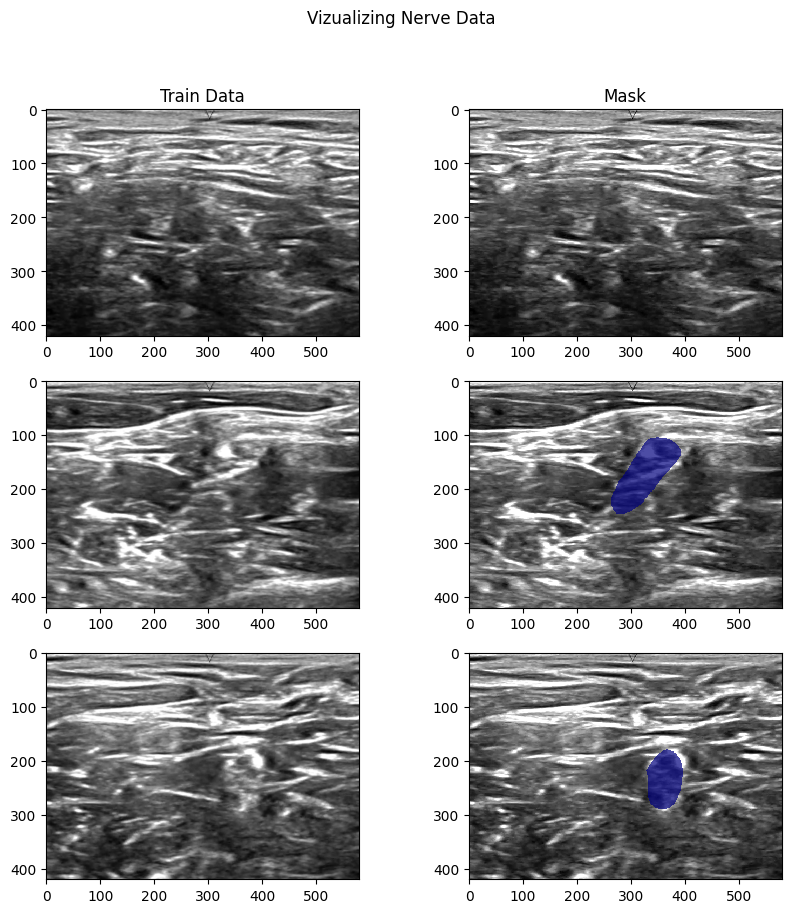

In [20]:
fig , ax = plt.subplots(3 , 2 , figsize=[10 , 10])
fig.suptitle('Vizualizing Nerve Data')
ax[0 , 0].set_title('Train Data')
ax[0 , 1].set_title('Mask')

# print(ax.shape)
for i in range(0 , 3):
  ind = random.randint(0 , len(train_image))
  img1 = np.array(Image.open("./content/train/" + str(train_image[ind])))
  ax[i , 0].imshow(img1 , cmap = 'gray')

  img2 = np.array(Image.open("./content/train/" + str(train_mask[ind])))
  img2 = np.ma.masked_where(img2 == 0, img2)
  ax[i , 1].imshow(img1 , cmap = 'gray' , interpolation = 'none')
  ax[i , 1].imshow(img2 , cmap = 'jet', interpolation = 'none', alpha = 0.7)
    
plt.show()

In [21]:
X = np.zeros((len(train_image), 128, 128, 1), dtype=np.float32)
y = np.zeros((len(train_image), 128, 128, 1), dtype=np.float32)

In [22]:
for n , img_name in enumerate(train_image):
  img = tf.keras.preprocessing.image.load_img('./content/train/'+img_name , grayscale=True)
  in_img = tf.keras.preprocessing.image.img_to_array(img)
  in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
  X[n] = in_img / 255.0
  
for n , img_name in enumerate(train_mask):
  img = tf.keras.preprocessing.image.load_img('./content/train/'+img_name , grayscale=True)
  in_img = tf.keras.preprocessing.image.img_to_array(img)
  in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
  y[n] = in_img / 255.0

C:\Users\kumar\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


In [23]:
from sklearn.model_selection import train_test_split
X_train , X_valid , y_train , y_valid = train_test_split(X , y , test_size = 0.1 , random_state = 42)

In [24]:
img_tensor = tf.keras.layers.Input((128 , 128 , 1) , name = 'img')
model = U_Net(img_tensor)
model.compile(optimizer = tf.keras.optimizers.Adam(),
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 128, 128, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 128, 128, 16)         160       ['img[0][0]']                 
                                                                                                  
 batch_normalization (Batch  (None, 128, 128, 16)         64        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 128, 128, 16)         0         ['batch_normalization[0][0

In [26]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1),
    tf.keras.callbacks.ModelCheckpoint('model_nerve.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [27]:
results = model.fit(X_train, y_train, batch_size=32  , epochs=1, callbacks=callbacks,\
                    validation_data=(X_valid, y_valid))

159/159 [==============================] - ETA: 0s - loss: 0.3101 - accuracy: 0.9360
Epoch 1: val_loss improved from inf to 0.19288, saving model to model_nerve.h5
159/159 [==============================] - 516s 3s/step - loss: 0.3101 - accuracy: 0.9360 - val_loss: 0.1929 - val_accuracy: 0.9829 - lr: 0.0010


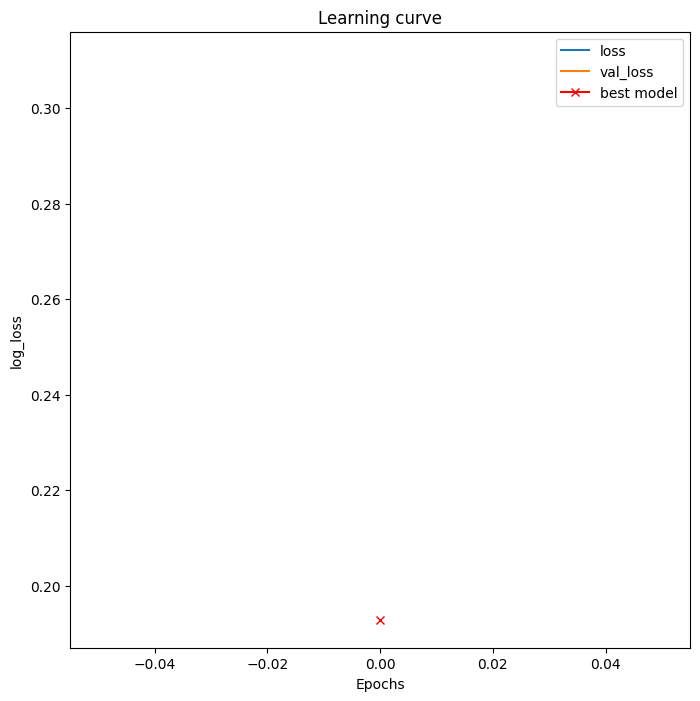

In [28]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(results.history["loss"], label="loss")
plt.plot(results.history["val_loss"], label="val_loss")
plt.plot( np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [30]:
model.save("nerve.h5")

C:\Users\kumar\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
from keras import models    
model = models.load_model('nerve.h5')

In [33]:
model.evaluate(X_valid, y_valid, verbose=1)


18/18 [==============================] - 12s 634ms/step - loss: 0.1929 - accuracy: 0.9829


[0.19287709891796112, 0.9828881025314331]

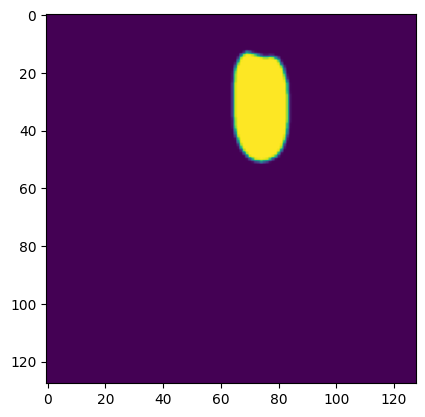

In [34]:
plt.imshow(y_valid[0].squeeze())

C:\Users\kumar\AppData\Roaming\Python\Python311\site-packages\keras\src\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


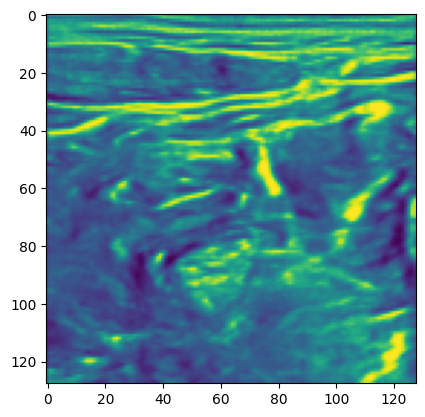

In [44]:
img_name = '12.tif'
img = tf.keras.preprocessing.image.load_img('./content/test/'+img_name , grayscale=True)
in_img = tf.keras.preprocessing.image.img_to_array(img)
in_img = skimage.transform.resize(in_img , (128 , 128 , 1) , mode = 'constant' , preserve_range = True)
test = in_img / 255.0
plt.imshow(test.squeeze())

In [45]:
prediction = model.predict(np.expand_dims(test , 0))

1/1 [==============================] - 0s 408ms/step


In [46]:
prediction.shape

(1, 128, 128, 1)

In [47]:
prediction.squeeze().shape

(128, 128)

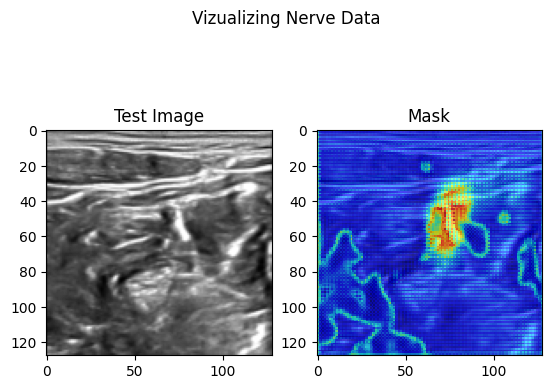

In [48]:
fig , ax = plt.subplots(1 , 2)
fig.suptitle('Vizualizing Nerve Data')
ax[0].set_title('Test Image')
ax[1].set_title('Mask')
img1 = test.squeeze()
ax[0].imshow(img1 , cmap = 'gray')

img2 = prediction.squeeze()
img2 = np.ma.masked_where(img2 == 0, img2)
ax[1].imshow(img1 , cmap = 'gray' , interpolation = 'none')
ax[1].imshow(img2 , cmap = 'jet', interpolation = 'none', alpha = 0.7)

plt.show()